# Importing the required Libraries

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Reading and displaying the dataset for interpretation

In [35]:
df=pd.read_csv("customer_pred_train.csv")
df.head(20)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
5,train_5,0,11.4763,-2.3182,12.6080,8.6264,10.9621,3.5609,4.5322,15.2255,...,-6.3068,6.6025,5.2912,0.4403,14.9452,1.0314,-3.6241,9.7670,12.5809,-4.7602
6,train_6,0,11.8091,-0.0832,9.3494,4.2916,11.1355,-8.0198,6.1961,12.0771,...,8.7830,6.4521,3.5325,0.1777,18.3314,0.5845,9.1104,9.1143,10.8869,-3.2097
7,train_7,0,13.5580,-7.9881,13.8776,7.5985,8.6543,0.8310,5.6890,22.3262,...,13.1700,6.5491,3.9906,5.8061,23.1407,-0.3776,4.2178,9.4237,8.6624,3.4806
8,train_8,0,16.1071,2.4426,13.9307,5.6327,8.8014,6.1630,4.4514,10.1854,...,1.4298,14.7510,1.6395,1.4181,14.8370,-1.9940,-1.0733,8.1975,19.5114,4.8453
9,train_9,0,12.5088,1.9743,8.8960,5.4508,13.6043,-16.2859,6.0637,16.8410,...,0.5543,6.3160,1.0371,3.6885,14.8344,0.4467,14.1287,7.9133,16.2375,14.2514


# Feature Analysis

In [36]:
df.isnull().sum()

ID_code    0
target     0
var_0      0
var_1      0
var_2      0
          ..
var_195    0
var_196    0
var_197    0
var_198    0
var_199    0
Length: 202, dtype: int64

In [37]:
df.shape

(200000, 202)

In [38]:
df.size

40400000

In [39]:
df.columns

Index(['ID_code', 'target', 'var_0', 'var_1', 'var_2', 'var_3', 'var_4',
       'var_5', 'var_6', 'var_7',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=202)

In [40]:
df.dtypes

ID_code     object
target       int64
var_0      float64
var_1      float64
var_2      float64
            ...   
var_195    float64
var_196    float64
var_197    float64
var_198    float64
var_199    float64
Length: 202, dtype: object

In [41]:
df.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


# Visualizations

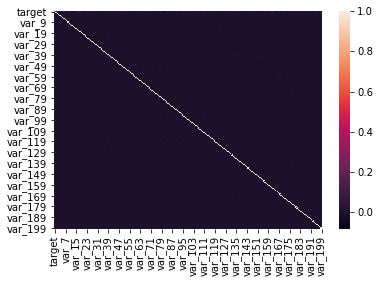

In [42]:
sns.heatmap(df.corr()) #very less correlation between features mean that the variables are made synthetically and maybe imbalanced

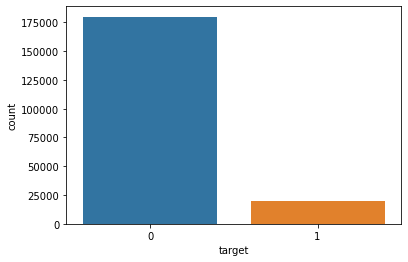

In [43]:
sns.countplot(x="target",data=df) #target class features are definitely imbalanced

In [45]:
df.groupby('target').agg('count') #understanding the counts of 1s and 0s in the target feature==> Definitely imbalanced

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
target,,,,,,,,,,,,,,,,,,,,,
0,179902,179902,179902,179902,179902,179902,179902,179902,179902,179902,...,179902,179902,179902,179902,179902,179902,179902,179902,179902,179902
1,20098,20098,20098,20098,20098,20098,20098,20098,20098,20098,...,20098,20098,20098,20098,20098,20098,20098,20098,20098,20098


# Underampling to get comparable nos. of 1s and 0s

Text(0.5, 1.0, 'Balanced Classes')

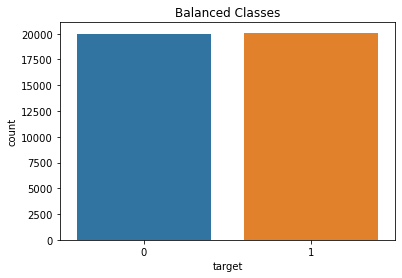

In [77]:

# Shuffle the Dataset.
shuffled_df = df.sample(frac=1,random_state=4)

# Put all the minority class (1s) in a separate dataset.
minority_class = shuffled_df.loc[shuffled_df['target'] == 1]

#Randomly select 20000 from the majority class (0s)
majority_class = shuffled_df.loc[shuffled_df['target'] == 0].sample(n=20000,random_state=42)

# Concatenate both dataframes again
normalized_df = pd.concat([minority_class, majority_class])

#plot the dataset after the undersampling
sns.countplot('target', data=normalized_df)
plt.title('Balanced Classes')

In [49]:
normalized_df.groupby('target').agg('count') #checking the 1s and 0s again in the target feature t check if there is imbalance

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
target,,,,,,,,,,,,,,,,,,,,,
0,19902,19902,19902,19902,19902,19902,19902,19902,19902,19902,...,19902,19902,19902,19902,19902,19902,19902,19902,19902,19902
1,20098,20098,20098,20098,20098,20098,20098,20098,20098,20098,...,20098,20098,20098,20098,20098,20098,20098,20098,20098,20098


# Defining input and output variables 

In [58]:
X=normalized_df.drop(["target","ID_code"],axis=1)
Y=np.asarray(normalized_df["target"])

In [59]:
scaler=StandardScaler()
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=4)

In [60]:
X_train=scaler.fit_transform(X_train)


In [61]:
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (32000, 200) (32000,)
Test set: (8000, 200) (8000,)


In [85]:
LR = LogisticRegression(C=0.02, solver='liblinear').fit(X_train,Y_train)
LR

LogisticRegression(C=0.02, solver='liblinear')

# Understanding the Feature importance

In [91]:
#IMP : Features with positive scores results in 1 value in Y_pred and vice versa
#IMP : Features which are very near to zero are noise and is not important and hence should be ommitted but I do not know to determine a correct threshold and omit them so I am leaving it as there. But not including those features will improve accuracy (I guess :P)

Feature: 0, Score: 0.16943
Feature: 1, Score: 0.16203
Feature: 2, Score: 0.19367
Feature: 3, Score: 0.03689
Feature: 4, Score: 0.05304
Feature: 5, Score: 0.12347
Feature: 6, Score: 0.22222
Feature: 7, Score: -0.00231
Feature: 8, Score: 0.06191
Feature: 9, Score: -0.13547
Feature: 10, Score: -0.00030
Feature: 11, Score: 0.09158
Feature: 12, Score: -0.21413
Feature: 13, Score: -0.17889
Feature: 14, Score: 0.01302
Feature: 15, Score: 0.05369
Feature: 16, Score: 0.02669
Feature: 17, Score: 0.01922
Feature: 18, Score: 0.11546
Feature: 19, Score: 0.03204
Feature: 20, Score: -0.06481
Feature: 21, Score: -0.18406
Feature: 22, Score: 0.19019
Feature: 23, Score: -0.08701
Feature: 24, Score: 0.07553
Feature: 25, Score: 0.06538
Feature: 26, Score: 0.22242
Feature: 27, Score: -0.02366
Feature: 28, Score: -0.07065
Feature: 29, Score: 0.04848
Feature: 30, Score: -0.00150
Feature: 31, Score: -0.10072
Feature: 32, Score: 0.10216
Feature: 33, Score: -0.15849
Feature: 34, Score: -0.18413
Feature: 35, Sco

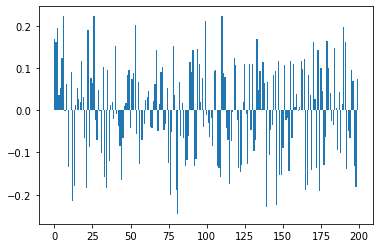

In [90]:
importance = LR.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [63]:
X_test=scaler.fit_transform(X_test)
Y_pred = LR.predict(X_test)

In [64]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.78      0.79      0.78      3974
           1       0.79      0.78      0.78      4026

    accuracy                           0.78      8000
   macro avg       0.78      0.78      0.78      8000
weighted avg       0.78      0.78      0.78      8000



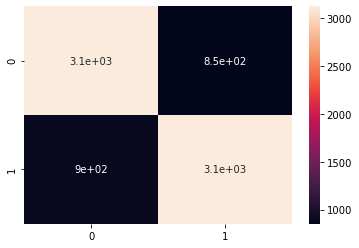

In [65]:
cnf=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cnf,annot=True)

In [66]:
df1=pd.read_csv("customer_pred_test.csv") #reading the test dataset

In [67]:
df1

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,test_199995,13.1678,1.0136,10.4333,6.7997,8.5974,-4.1641,4.8579,14.7625,-2.7239,...,2.0544,9.6849,4.6734,-1.3660,12.8721,1.2013,-4.6195,9.1568,18.2102,4.8801
199996,test_199996,9.7171,-9.1462,7.3443,9.1421,12.8936,3.0191,5.6888,18.8862,5.0915,...,5.0071,6.6548,1.8197,2.4104,18.9037,-0.9337,2.9995,9.1112,18.1740,-20.7689
199997,test_199997,11.6360,2.2769,11.2074,7.7649,12.6796,11.3224,5.3883,18.3794,1.6603,...,5.1536,2.6498,2.4937,-0.0637,20.0609,-1.1742,-4.1524,9.1933,11.7905,-22.2762
199998,test_199998,13.5745,-0.5134,13.6584,7.4855,11.2241,-11.3037,4.1959,16.8280,5.3208,...,3.4259,8.5012,2.2713,5.7621,17.0056,1.1763,-2.3761,8.1079,8.7735,-0.2122


# Defining and standardizing the inputs from the test dataset

In [68]:
X1=df1.drop(["ID_code"],axis=1)
X1=scaler.fit_transform(X1)

In [69]:
Y1_pred=LR.predict(X1) #making predictions with the trained model

In [70]:
df1["target"]=Y1_pred #storing the output predictions into the dataframe

In [71]:
final_predictions=df1[["ID_code","target"]] #creating a new dataframe as per kaggle submission requirement
final_predictions

,ID_code,target
0,test_0,1
1,test_1,1
2,test_2,1
3,test_3,1
4,test_4,1
...,...,...
199995,test_199995,0
199996,test_199996,1
199997,test_199997,0
199998,test_199998,1


In [72]:
final_predictions.reset_index(drop=True, inplace=True) #resetting the index in the dataframe

In [73]:
final_predictions.to_csv('Santander_Customer_Transaction_Prediction.csv') #converting the final dataframe into CSV